In [1]:
import seaborn as sns
titanic = sns.load_dataset("titanic")

In [5]:
Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)

In [6]:
IQR = Q3 - Q1

In [7]:
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

In [9]:
mask = titanic['fare'].between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

In [10]:
mask

0       True
1      False
2       True
3       True
4       True
       ...  
886     True
887     True
888     True
889     True
890     True
Name: fare, Length: 891, dtype: bool

In [49]:
filtrados = titanic[mask]
filtrados

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [50]:
outliers = titanic[~mask]
outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
849,1,1,female,NaN,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False


In [52]:
outliers['fare'].mean()

128.29162931034483

### mask y where

mask y el método .where son dos formas de seleccionar y modificar los datos de un dataframe o una serie de pandas según una condición. Ambos métodos reciben como primer argumento la condición que se evalúa para cada elemento, y como segundo argumento el valor que se usa para reemplazar los elementos donde la condición es verdadera o falsa, respectivamente.

In [18]:
titanic['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

Observamos que la media de la tarifa es de 32.20 dólares, pero hay una gran desviación estándar de 49.69 dólares, lo que indica una alta variabilidad en los datos. También vemos que el valor máximo es de 512.33 dólares, lo que parece muy alto en comparación con el resto de los valores. Podemos sospechar que este valor es un outlier o un valor atípico que distorsiona la media.

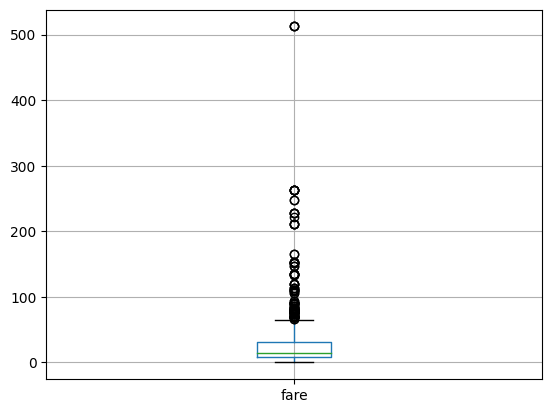

In [19]:
import matplotlib.pyplot as plt
titanic.boxplot(column='fare')
plt.show()


In [26]:
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR


In [43]:
titanic = sns.load_dataset("titanic")

In [44]:
titanic['fare'] = titanic['fare'].mask(titanic['fare'] > lim_sup, media_fare)


In [45]:
titanic['fare']

0       7.250000
1      17.822091
2       7.925000
3      53.100000
4       8.050000
         ...    
886    13.000000
887    30.000000
888    23.450000
889    30.000000
890     7.750000
Name: fare, Length: 891, dtype: float64

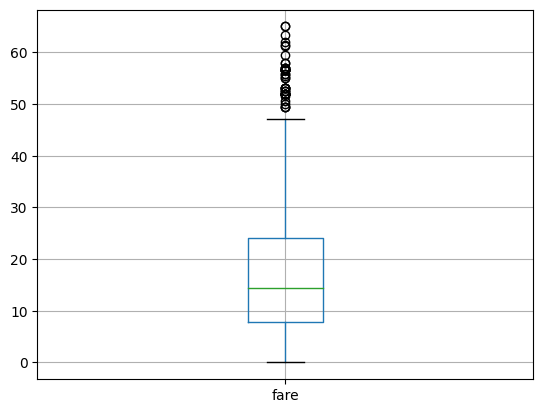

In [46]:
titanic.boxplot(column='fare')
plt.show()

In [21]:
import pandas as pd
df = pd.DataFrame({'nombre': ['Ana', 'Beto', 'Carla', 'David'], 'edad': [18, 19, 20, 21], 'nota': [8.5, 7.0, 9.0, 6.5]})
df

,nombre,edad,nota
0,Ana,18,8.5
1,Beto,19,7.0
2,Carla,20,9.0
3,David,21,6.5


El método .mask es una forma de reemplazar los valores de un dataframe o una serie según una condición. Por ejemplo, si queremos reemplazar las notas que son menores que 7 por cero, podemos usar el método .mask así

In [41]:
df["nota_corregida"] = df['nota'].mask(df['nota'] < 7, 0)

0    0.0
1    0.0
2    0.0
3    6.5
Name: nota, dtype: float64

In [42]:
df

,nombre,edad,nota,nota_corregida
0,Ana,18,8.5,8.5
1,Beto,19,7.0,7.0
2,Carla,20,9.0,9.0
3,David,21,6.5,0.0


El método .where es lo opuesto al método .mask: conserva los valores donde la condición es verdadera y los reemplaza donde es falsa.

In [24]:
mean = df['edad'].where(df['edad'] <= 19).mean()
mean

18.5

In [25]:
df['edad'].where(df['edad'] <= 19, mean)

0    18.0
1    19.0
2    18.5
3    18.5
Name: edad, dtype: float64